# Patrones de Turing
Martina García Mejía

Importar paquetes y definir funciones.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def nablasq(fun,h):
    return (fun[0:-2,1:-1]+fun[1:-1,0:-2]+fun[2:,1:-1]+fun[1:-1,2:]-4*fun[1:-1,1:-1])/h**2

Parámetros y demás

In [3]:
yi, yf = xi, xf = (0, 1)
h = 0.02

a = 0.00028
b = 0.005
tau = 0.1
k = -0.005

lim_yi = lim_yf = 0
lim_xi = lim_xf = 0

tf = 10
dt = 0.001

graph_freq = 2

In [4]:
x, y = np.meshgrid(np.arange(xi, xf, h),
                   np.arange(yi, yf, h))

phi = np.random.rand(x.shape[0], x.shape[1])
psi = np.random.rand(x.shape[0], x.shape[1])

Patrones en sí

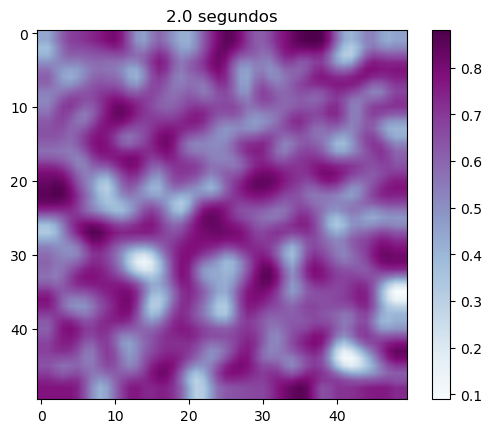

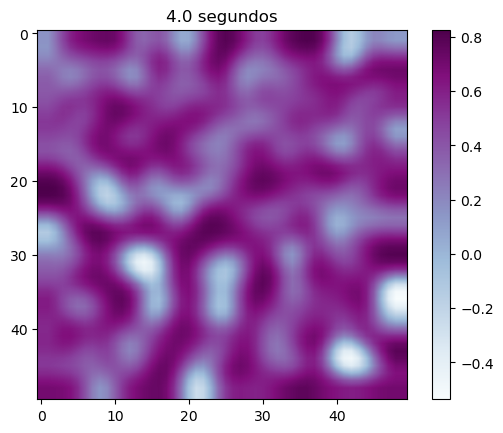

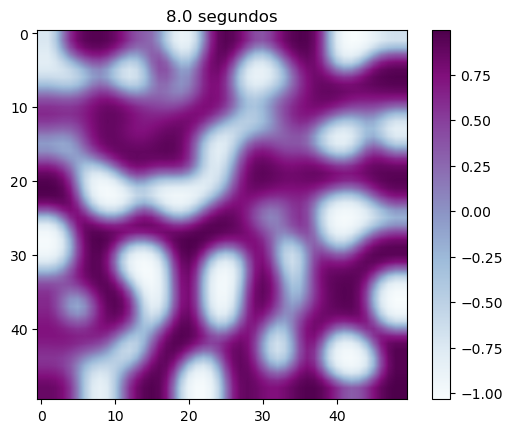

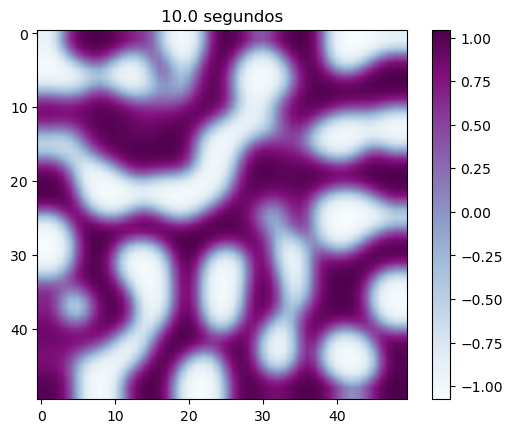

In [5]:
for t in np.arange(dt,tf+dt,dt):
    dphi, dpsi = (nablasq(phi,h), nablasq(psi,h))
    phi_bl, psi_bl = (phi[1:-1,1:-1], psi[1:-1,1:-1])

    phi[1:-1,1:-1] = phi_bl + dt*(a*dphi+phi_bl-(phi_bl**3)-psi_bl+k)
    psi[1:-1,1:-1] = psi_bl + dt*(b*dpsi+phi_bl-psi_bl)/tau

    for fun in (phi,psi):
       fun[0,:] = fun[1,:]
       fun[-1,:] = fun[-2,:]
       fun[:,0] = fun[:,1]
       fun[:,-1] = fun[:,-2]

    if t%graph_freq == 0:
        plt.imshow(phi+psi, cmap='BuPu', interpolation='bilinear')
        plt.title(f'{t} segundos')
        plt.colorbar()
        plt.show()
